<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230-Datathon1/blob/main/Datathon_1_BMI_Lily_Edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# set up libraries

from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

uploaded = files.upload()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


In [4]:
from pandas.io.stata import BytesIO
# Read dataset into Pandas dataframe
data = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))

# display first few rows of data
data.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [5]:
# Info on data
print(data.shape)

print(data.columns)

(23535, 10)
Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


In [6]:
# Summary Statistics
print(data.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In [7]:
# Look at unique values for each variable

for column in ['Gender','Fast_Food_Frequency','Screen_Time']:
  print(f"{column} : {sorted(data[column].unique())}")

Gender : ['Female', 'Male']
Fast_Food_Frequency : [0, 1, 2, 3, 4]
Screen_Time : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]



- age, caloric intake, sugar intake, physical activity, BMI are continuous
- fast food, screen time is categorical

In [8]:
# check for missing values
print(data.isnull().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


- No missing values

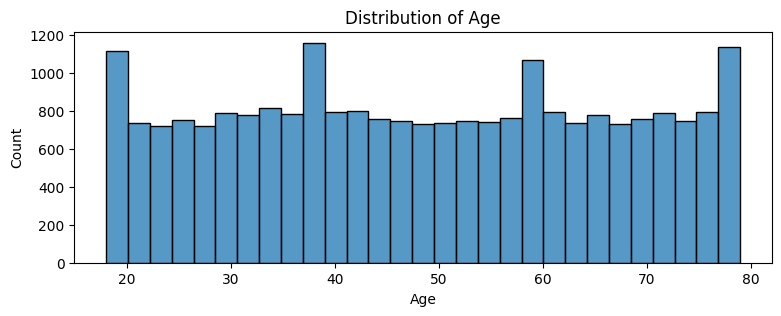

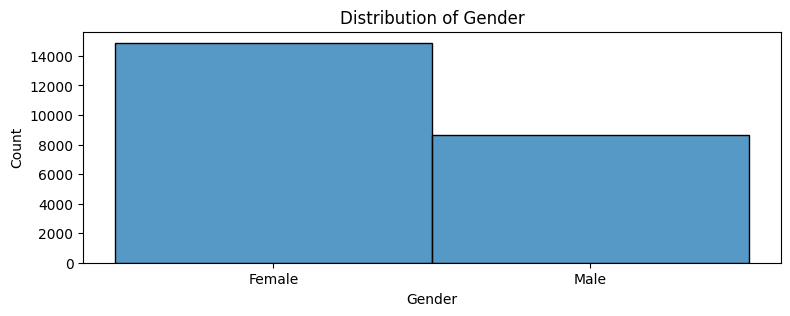

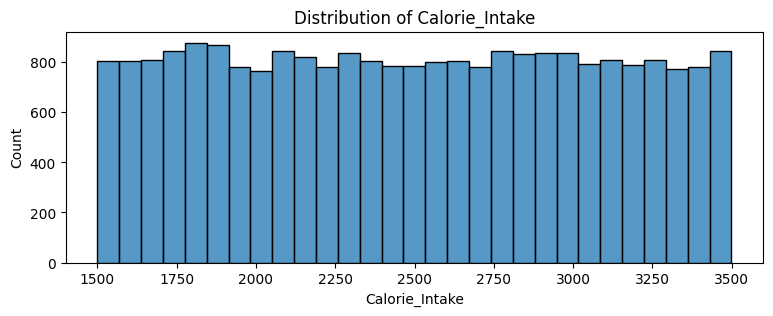

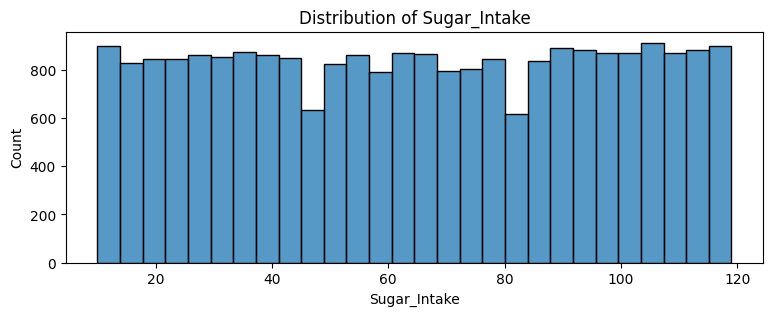

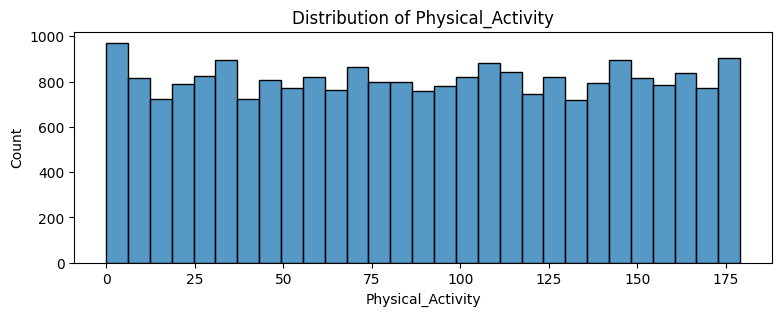

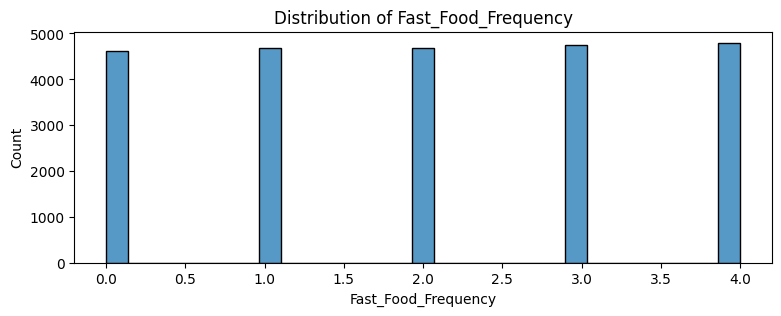

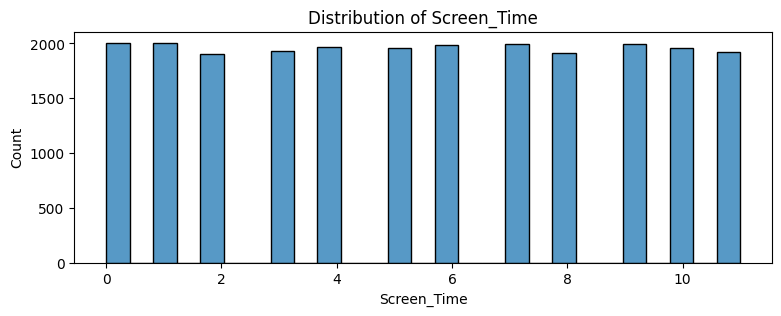

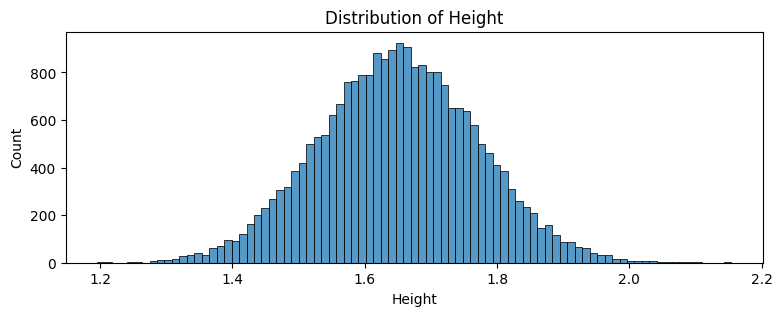

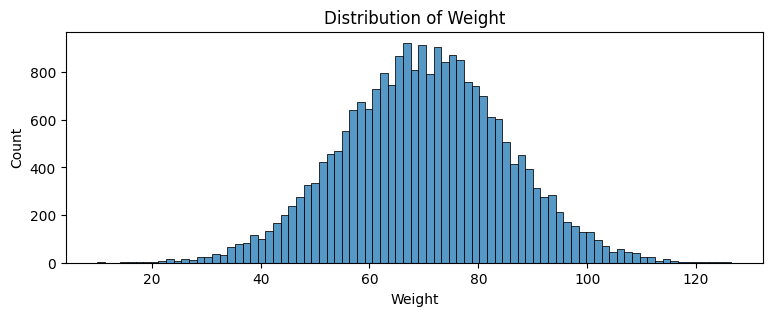

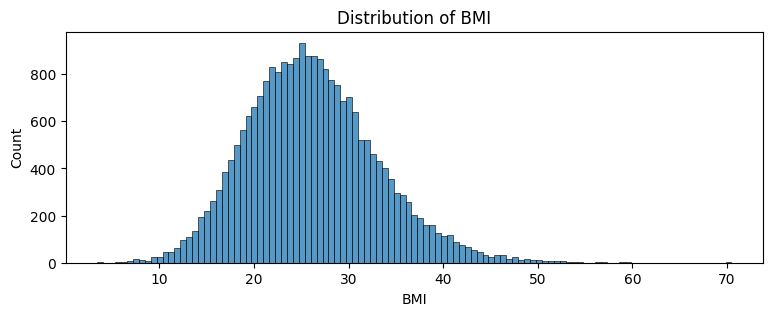

In [9]:
  # Visualize histograms for all variables

  for column in data.columns:
    plt.figure(figsize=(9, 3))
    sns.histplot(data[column], kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


We can see that:
- gender: more females and males
- BMI follows normal distribution, could be an issue with underfeeding and overfeeding
- rest of variables are fairly evenly distributed

In [10]:
# Re-coding BMI into categories
def bmi_categorize(bmi):
  if bmi < 18.5:
    return '0' # underweight
  elif 18.5 <= bmi < 25:
    return '1' # normal
  elif 25 <= bmi < 30:
    return '2' # overweight, moderate risk
  else:
    return '3' # obese, high risk

data['BMI_Cat'] = data["BMI"].apply(bmi_categorize)
data.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,BMI_Cat
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343,3
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877,2
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417,2
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720,3
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685,2


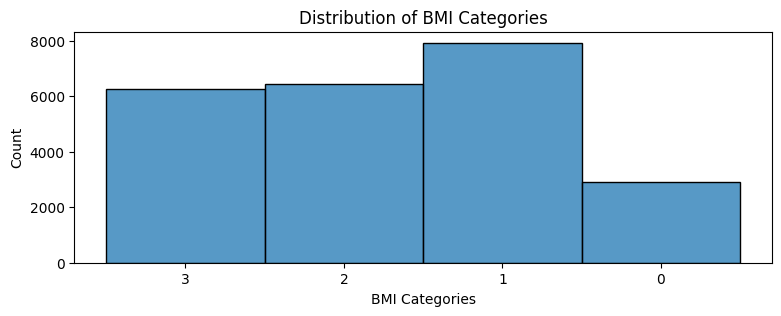

In [11]:
# looking at distribution of BMI
plt.figure(figsize=(9,3))
sns.histplot(data["BMI_Cat"], bins = 4, kde=False)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

- We see that 'underweight' category has much smaller sample size compared to rest of categories
- 'normal' BMI has highest sample
- lets try to even it out by reducing the number of bins
- we can makybe change the question to see who lifestyle choices effect obseity

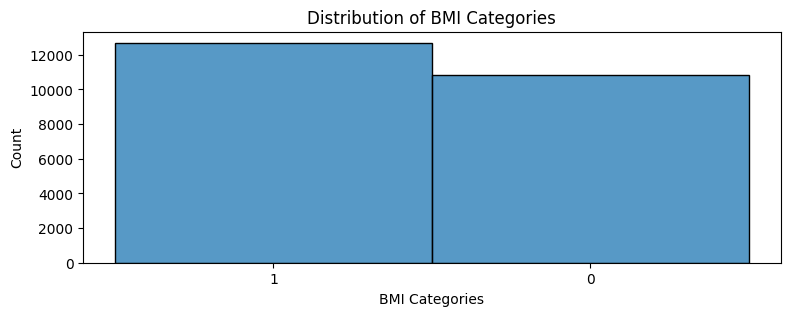

In [12]:
# Re-coding BMI into 2 bins
def bmi_categorize(bmi):
  if bmi < 25:
    return '0' # underweight and normal
  else:
    return '1' # obese/overwight, high risk

data['BMI_Cat'] = data["BMI"].apply(bmi_categorize)
data.head()

# looking at distribution of BMI
plt.figure(figsize=(9,3))
sns.histplot(data["BMI_Cat"], bins = 2, kde=False)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

Looks more even now, 'overweight' category still has higher sample size

In [13]:
# Group dataset by Gender

data_female = data[data['Gender'] == 'Female']

data_female.head()
data_female.shape # a lot of data for female category


(14896, 11)

In [14]:
data_male = data[data['Gender'] == 'Male']
data_male.head()
data_male.shape # not a lot of data for male category, models may be difficult

(8639, 11)

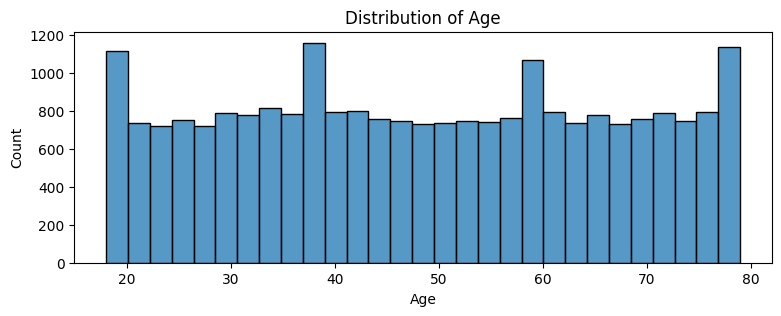

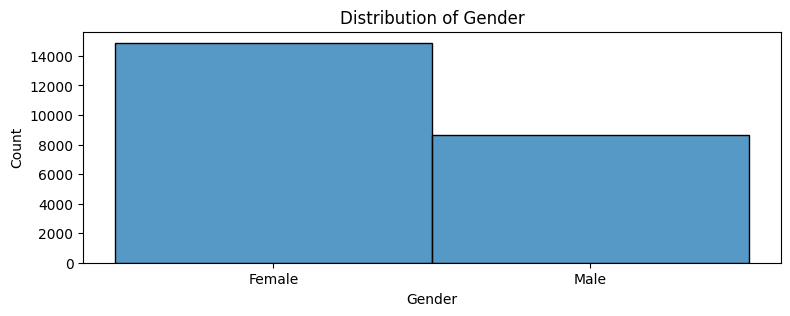

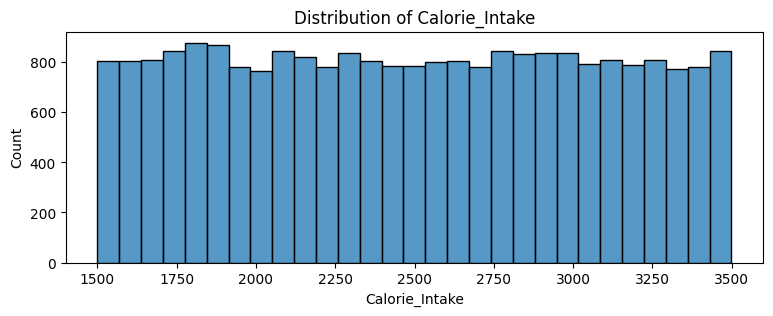

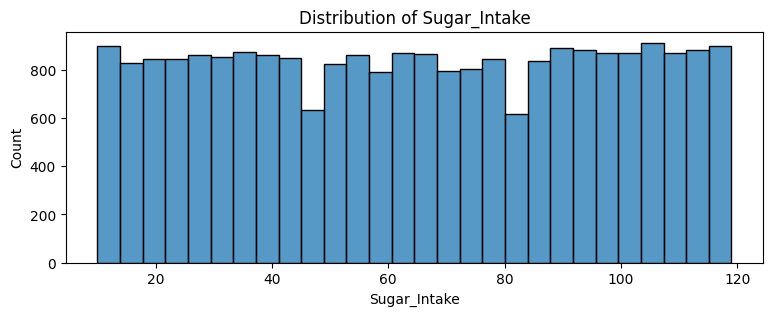

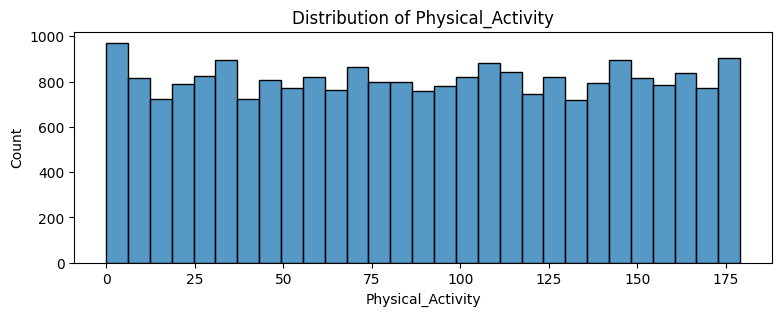

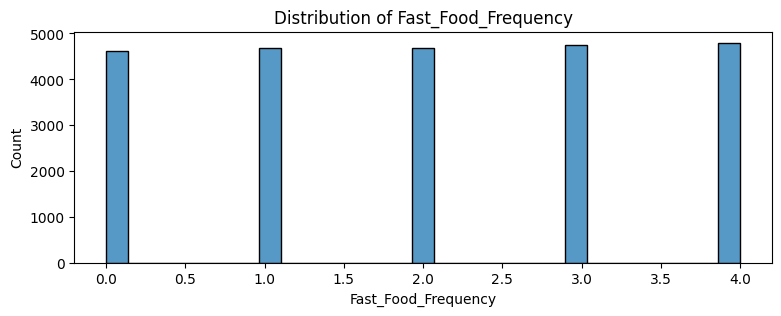

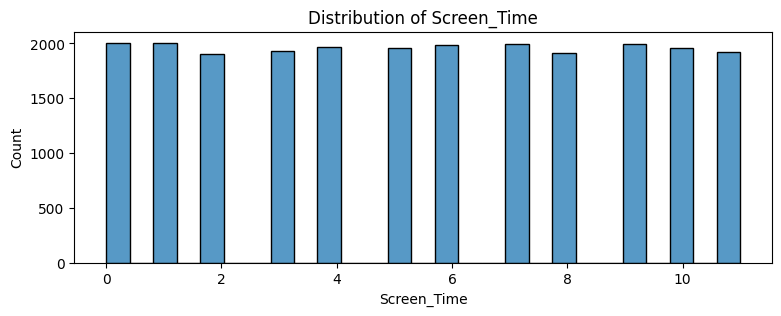

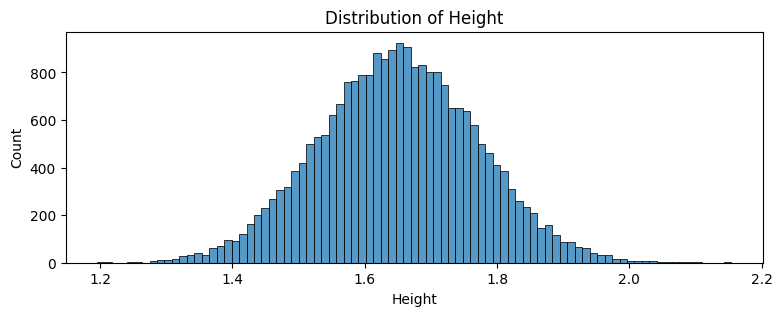

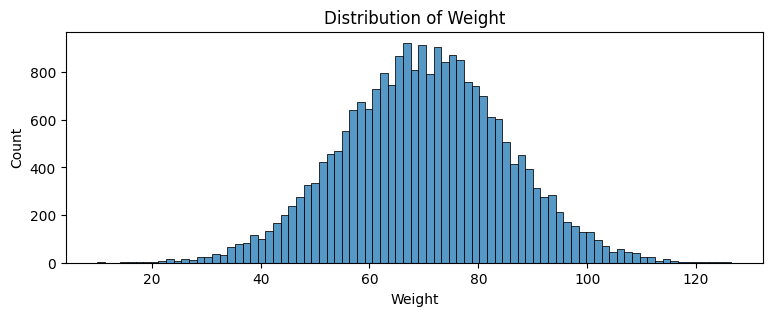

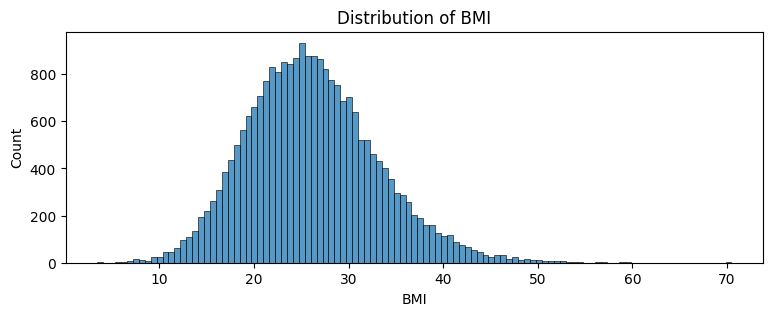

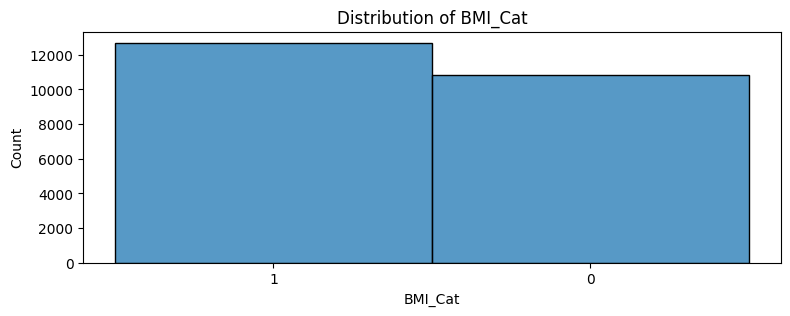

In [15]:
# Distribtion for female group

for column in data_female.columns:
    plt.figure(figsize=(9, 3))
    sns.histplot(data[column], kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [71]:
# KNN model Female
from imblearn.over_sampling import SMOTE  # Import SMOTE for resampling

# KNN model Female

# split data into features and labels
X = data_female[["Age","Calorie_Intake","Sugar_Intake","Physical_Activity",'Fast_Food_Frequency']]
y = data_female["BMI_Cat"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE resampling to balance the classes
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=30)  # Setting K to 4 as an example
knn.fit(X_train_resampled, y_train_resampled)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[766 559]
 [945 710]]
              precision    recall  f1-score   support

           0       0.45      0.58      0.50      1325
           1       0.56      0.43      0.49      1655

    accuracy                           0.50      2980
   macro avg       0.50      0.50      0.50      2980
weighted avg       0.51      0.50      0.49      2980



- poor precision(Precision is a measure of how many of the positive predictions made are correct) for model
- Used SMOTE resamplig to oversample the minority class and make the dataset more balanced
- Recall is a measure of how many of the positive cases the classifier correctly predicted
- F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two

In [56]:

# KNN model Female

# split data into features and labels
X = data_female[["Age","Calorie_Intake","Sugar_Intake","Physical_Activity",'Fast_Food_Frequency']]
y = data_female["BMI_Cat"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors= 29, metric = 'euclidean')
knn.fit(X_train, y_train)

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 445  880]
 [ 539 1116]]
              precision    recall  f1-score   support

           0       0.45      0.34      0.39      1325
           1       0.56      0.67      0.61      1655

    accuracy                           0.52      2980
   macro avg       0.51      0.51      0.50      2980
weighted avg       0.51      0.52      0.51      2980



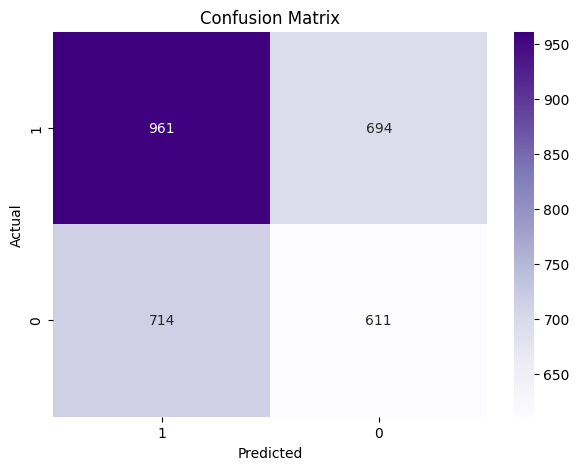

In [ ]:
# Visualization of Confusion Matrix Heatmap

# Get unique classes
classes = data_female["BMI_Cat"].unique()

# plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- looks like model prediction for 'overweight/obese' is good but not for 'normal/underwight'